In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [234]:
#Importing dataset

dataa = pd.read_csv("C:/tel dataset/CodSoft/Titanic-Dataset.csv")
dataa

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Here,I will otline the definitions of columns in the titanic dataset.<br>
<br>
<b>Survived</b> : Weather Survived or not: 0 = Not Survived, 1 = Survived<br>
<b>Pclass</b> : Ticket class where 1 = First class, 2 = Second class, 3 = Third class<br>
<b>Sex</b> : Gender(Male or Female)<br>
<b>Age</b> : Age in Years<br>
<b>SibSp</b> : No. of siblings / spouses aboard the Titanic<br>
<b>Parch</b> : No. of parents / children aboard the Titanic<br>
<b>Ticket</b> : Ticket number<br>
<b>Fare</b> : Passenger fare<br>
<b>Embarked</b> : Point of embarkation where C=Cherbourg, Q=Queenstown, S=Southampton

In [8]:
dataa.shape

(891, 12)

In [9]:
dataa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
dataa.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
dataa.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

# Exploratory Data Analysis

In [39]:
dataa.groupby("Sex")["Survived"].agg("sum").reset_index()

,Sex,Survived
0,female,233
1,male,109


We observe that 68% of all survivers are females and remaining 32% of survivors are males.

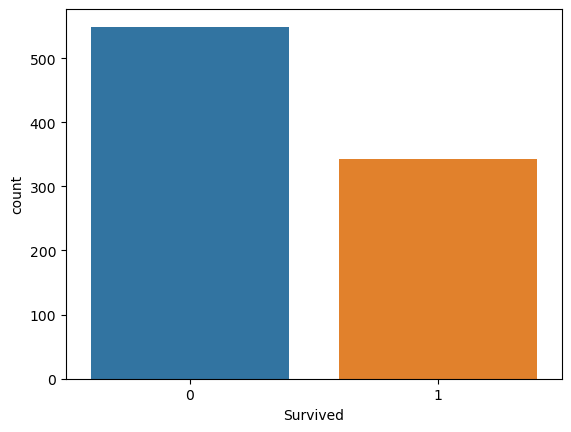

In [53]:
#Survived : Weather Survived or not: 0 = Not Survived, 1 = Survived

sns.countplot(x="Survived", data=dataa)
plt.show()

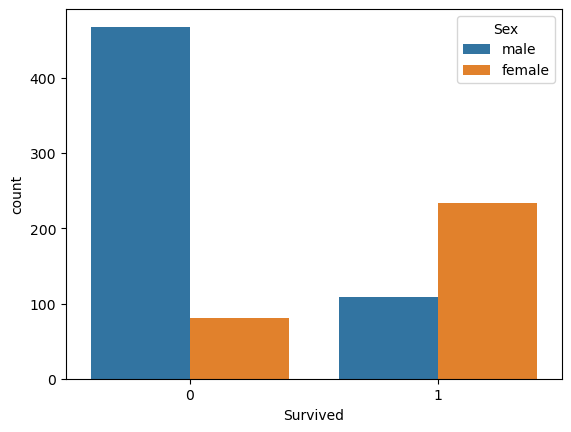

In [56]:
sns.countplot(x="Survived",hue="Sex",data=dataa)
plt.show()

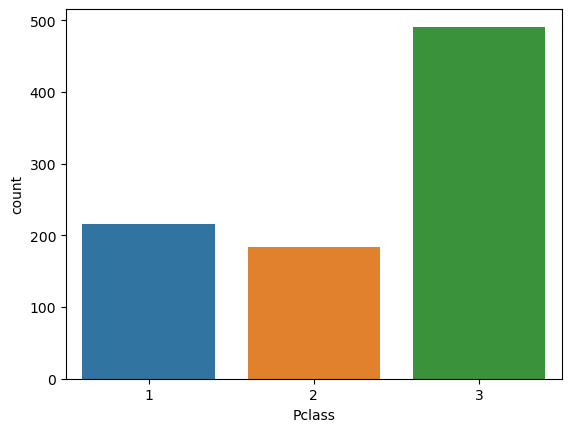

In [57]:
sns.countplot(x="Pclass",data=dataa)
plt.show()

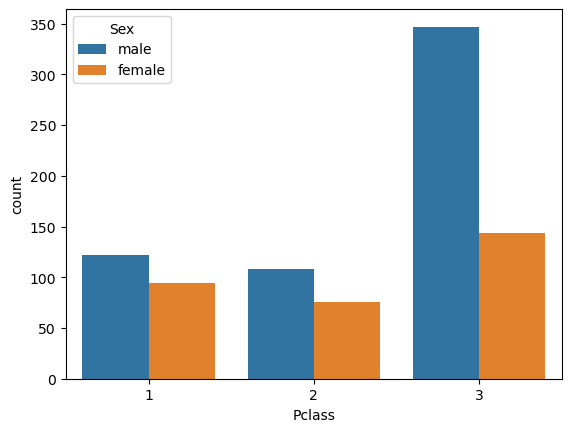

In [58]:
sns.countplot(x="Pclass",data=dataa,hue="Sex")
plt.show()

From the above countplot we observe that female passengers are more than male passengers in all 3 classes.

In [81]:
dataa["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [86]:
dataa[["Sex","Survived"]].groupby("Sex").mean().sort_values(by="Survived",ascending = False).reset_index()

,Sex,Survived
0,female,0.742038
1,male,0.188908


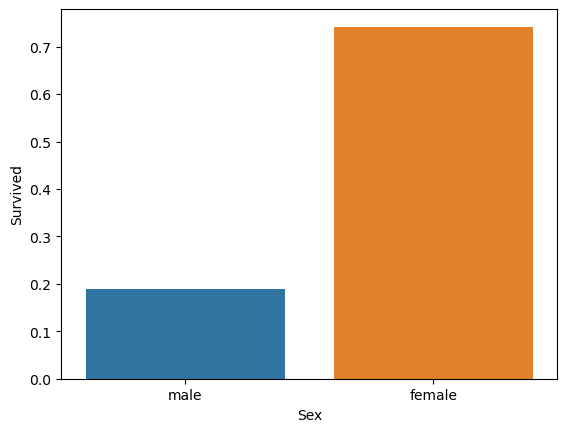

In [93]:
sns.barplot(x="Sex",y="Survived",data=dataa,errorbar=None)
plt.show()

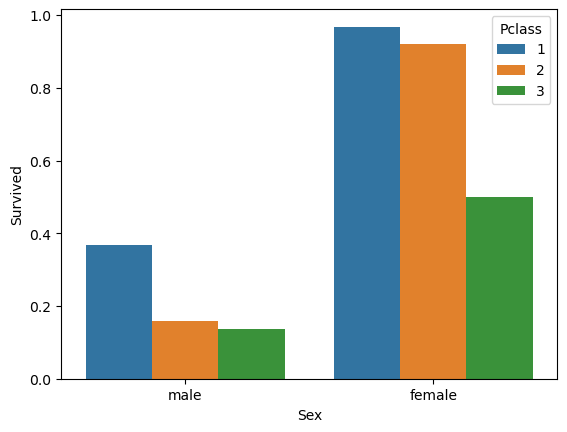

In [94]:
sns.barplot(x="Sex",y="Survived",data=dataa,hue="Pclass",errorbar=None)
plt.show()

From the above barplot we can observe that: <br>&emsp;&emsp;&emsp;The passengers who are travelled in First class were survived more than the passengers travelled in remaining two passengers class.<br>&emsp;&emsp;&emsp;The passengers who are travelled in Second class were survived mpre than the passengers travelled in third class.<br>&emsp;&emsp;&emsp;When compared to first,second and third class passengers,Third class passengers had lesser number in suvival data.

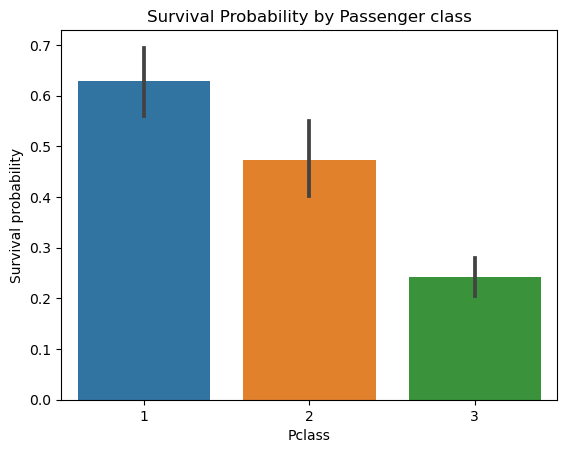

In [13]:
sns.barplot(data=dataa,x="Pclass",y="Survived")
plt.title("Survival Probability by Passenger class")
plt.ylabel("Survival probability")
plt.show()

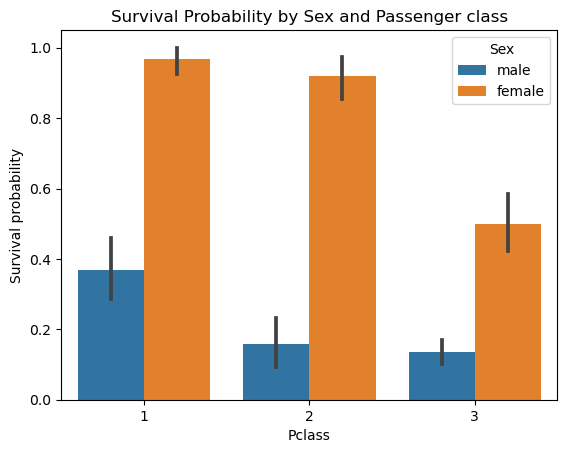

In [12]:
sns.barplot(data=dataa,x="Pclass",y="Survived",hue="Sex")
plt.title("Survival Probability by Sex and Passenger class")
plt.ylabel("Survival probability")
plt.show()

In [17]:
dataa["Embarked"].value_counts(dropna=True)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [20]:
dataa[["Survived","Embarked"]].groupby("Embarked",as_index=True).agg("mean").sort_values(by="Survived",ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


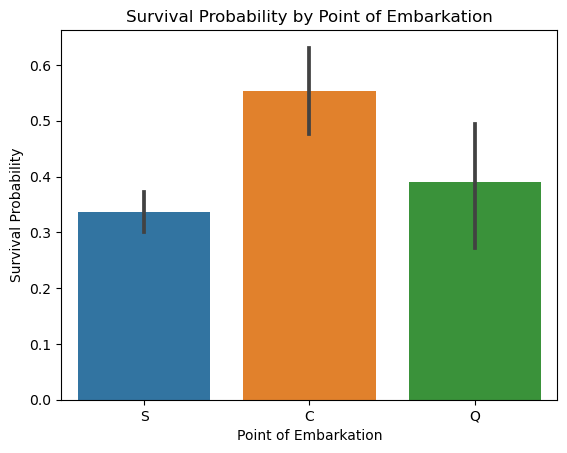

In [25]:
sns.barplot(x="Embarked",y="Survived",data=dataa)
plt.title("Survival Probability by Point of Embarkation")
plt.xlabel("Point of Embarkation")
plt.ylabel("Survival Probability")
plt.show()

Survival probability for "loacation-C" is higher and lowest for "location-S".<br>
<br>
<br>
&emsp;&emsp;&emsp;We can formate a hypothesis where the majority of first class passengers are embarked from location-c.Because,majority of survived passengers are from fisrt class,this resulted in location C having highest survival probability.Alternatively,majority of third class passenges are embarked from location S.Because,third class passengers had lowest survival probability,this resulted in location S having lowest survival probability.<br>

C:\Users\venkatesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


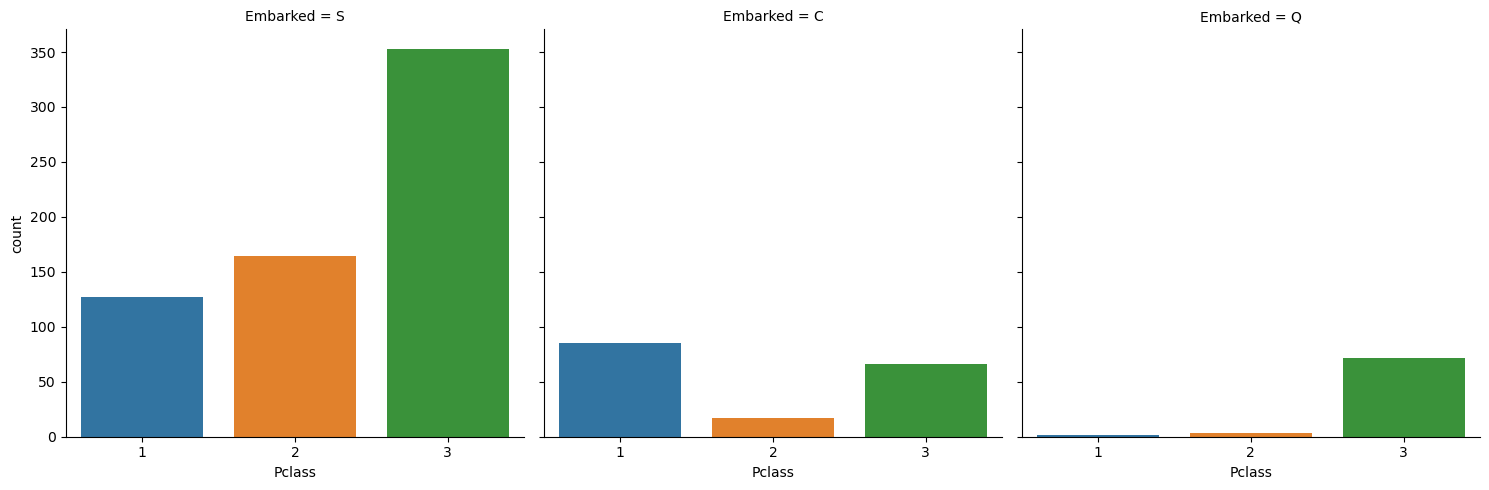

In [73]:
sns.catplot(x="Pclass",col="Embarked",data=dataa,kind="count")
plt.show()

Hypothesis appears to be true. Location S has the most third class passengers whereas location C has most third class passengers.

C:\Users\venkatesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


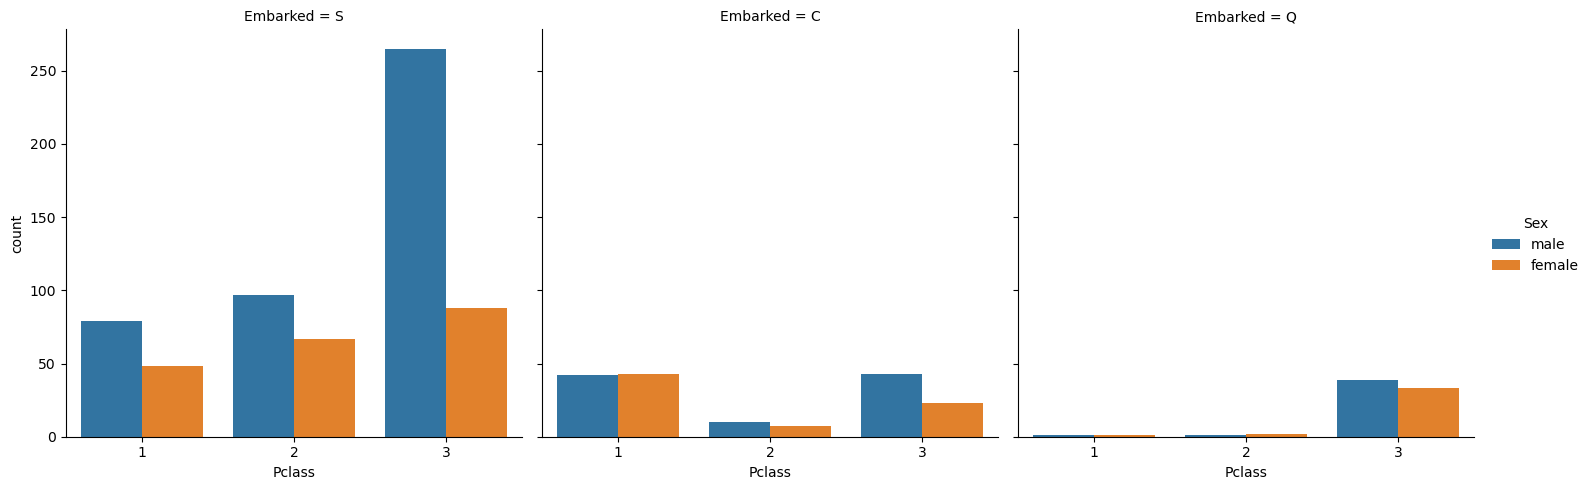

In [74]:
sns.catplot(x="Pclass",col="Embarked",data=dataa,kind="count",hue = "Sex")
plt.show()

C:\Users\venkatesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


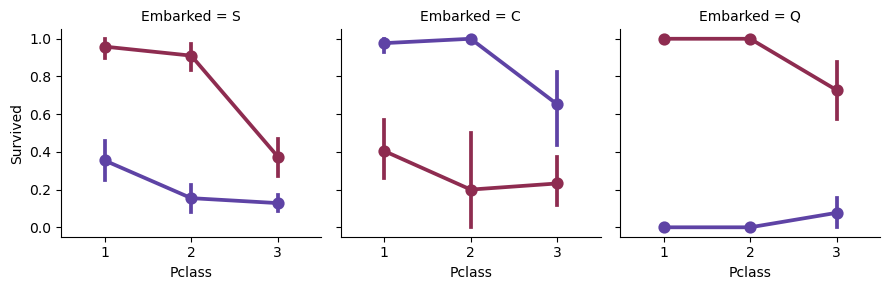

In [110]:
z=sns.FacetGrid(dataa,col="Embarked")
z.map_dataframe(sns.pointplot,x="Pclass",y="Survived",hue="Sex",palette="twilight")#,linestyle="-",marker="o",markerfacecolor="red",color="geen",legend='full',errorbar=("ci"))
plt.show()

# Detect and remove Outliers in numerical variables
<br>
&emsp;&emsp;&emsp;Outliers are datapoints that have extreme values and they do not conform with the majority of data.It is important to address this because,outliers thed to skew our data towards extremes and can cause inaccurate model predictions.

In [154]:
print(len(dataa))
Outliers =[27,88,159,180,201,324,341,792,846,863]
dataa=dataa.drop(Outliers)
print(len(dataa))

891
881


<Axes: >

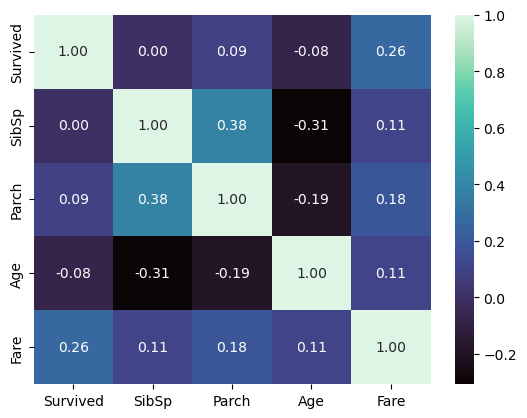

In [155]:
#Numerical Variables correlation with survival

sns.heatmap(dataa[['Survived','SibSp','Parch','Age','Fare']].corr(),annot=True,fmt='.2f',cmap='mako')

In [156]:
dataa["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     13
5      5
Name: count, dtype: int64

In [157]:
#Mean of Survival by SibSp

dataa[["Survived","SibSp"]].groupby("SibSp",as_index=False)["Survived"].mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


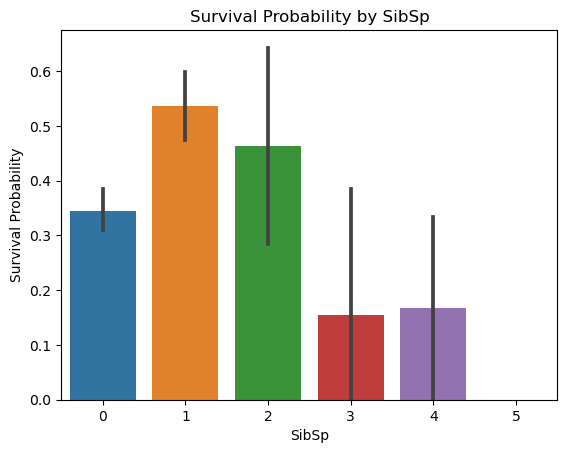

In [173]:
sns.barplot(x="SibSp",y="Survived",data=dataa)
plt.title("Survival Probability by SibSp")
plt.xlabel("SibSp")
plt.ylabel("Survival Probability")
plt.show()

In [165]:
dataa['Parch'].value_counts(dropna=False)

Parch
0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [168]:
dataa[["Parch","Survived"]].groupby("Parch",as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


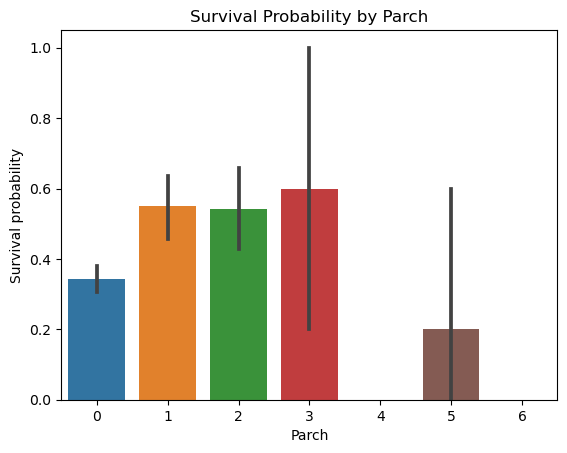

In [171]:
sns.barplot(x="Parch",y="Survived",data=dataa)
plt.title("Survival Probability by Parch")
plt.xlabel("Parch")
plt.ylabel("Survival probability")
plt.show()

In [175]:
dataa["Age"].isnull().sum()

170

C:\Users\venkatesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


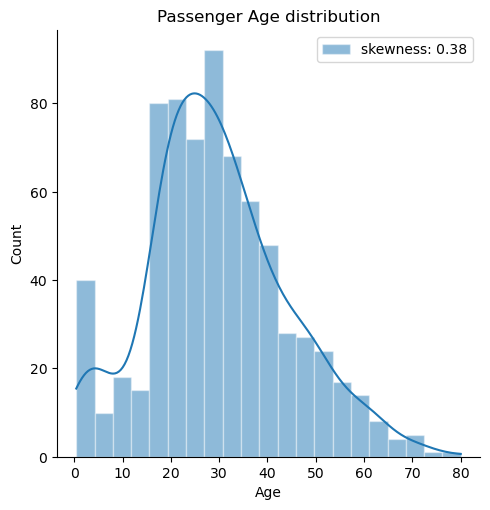

In [194]:
#kde=Kernel Density Estimate

sns.displot(dataa["Age"],kde=True,edgecolor=(1,1,1,.4),label="skewness: %.2f"%(dataa["Age"].skew()))
plt.legend(loc="best")
plt.title("Passenger Age distribution")
plt.show()

C:\Users\venkatesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


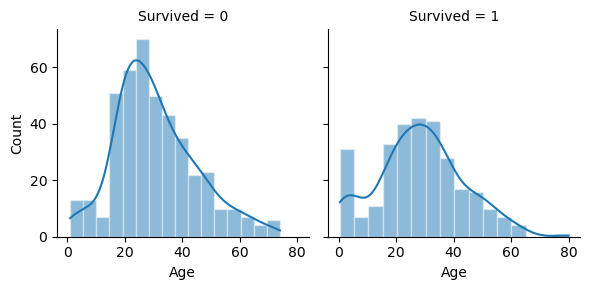

In [202]:
z=sns.FacetGrid(dataa,col="Survived")
z.map(sns.histplot,"Age",kde=True,edgecolor=(1,1,1,.4))

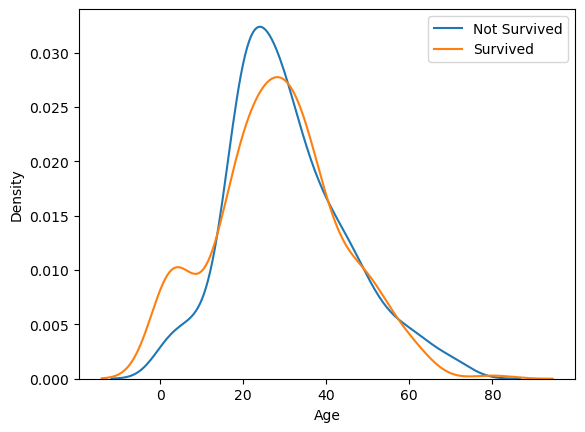

In [204]:
sns.kdeplot(dataa["Age"][dataa["Survived"]==0],label="Not Survived")
sns.kdeplot(dataa["Age"][dataa["Survived"]==1],label="Survived")
plt.legend()
plt.show()

In [205]:
dataa["Fare"].isnull().sum()

0

C:\Users\venkatesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


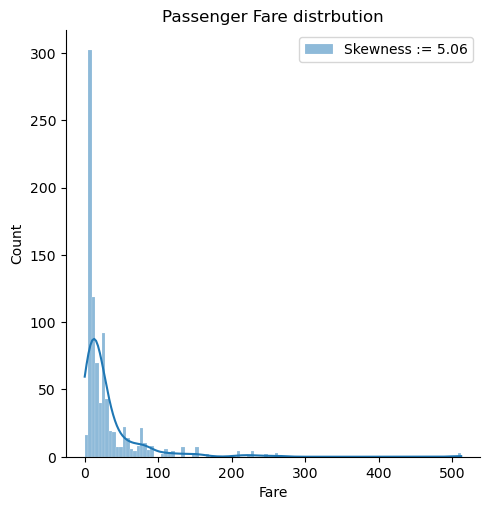

In [218]:
sns.displot(dataa["Fare"],kde=True,edgecolor=(1,1,1,.4),label="Skewness := %.2f"%dataa["Fare"].skew())
plt.legend(loc="best")
plt.title("Passenger Fare distrbution")
plt.show()

# <b>Obsevations:</b>
There are three main points that can conclude from analysis.
<br>
&emsp;&emsp;&emsp;1.Female passengers were more likely to survive than male passengers<br>
&emsp;&emsp;&emsp;2.First class passengers have a higher mean of survival than the second class as well as third class passengers<br>
&emsp;&emsp;&emsp;3.Passengers that of younger ages especially children were more likely to survive than passengers that were of older passengers.This is because just like woman, children were also prioritized during the evacuation of titanic causing them to have higher chance of survival than the other passengers.

# Data Preprocessing
&emsp;&emsp;&emsp;Data preprocessing is the process of getting our daaset ready for model training.<br>
<br>
&emsp;&emsp;<b>i.</b>Drop and fill missing values.<br>
&emsp;&emsp;<b>ii.</b>Data Transformation.<br>
&emsp;&emsp;<b>iii.</b>Feature engineering.<br>
&emsp;&emsp;<b>iv.</b>Feature encoding.

i.Drop and filling missing values

In [235]:
dataa.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [236]:
dataa.drop(["Ticket","Cabin"],axis=1,inplace=True)

In [237]:
Mod = dataa["Embarked"].mode().iloc[0]
print(Mod)

S


In [238]:
dataa["Embarked"].fillna(Mod,inplace=True)
dataa.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

The goal is to use features that are most correlated with Age to predict the values for Age

In [239]:
dataa["Sex"]=dataa["Sex"].replace({"male" : 0,"female" : 1})
dataa["Sex"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

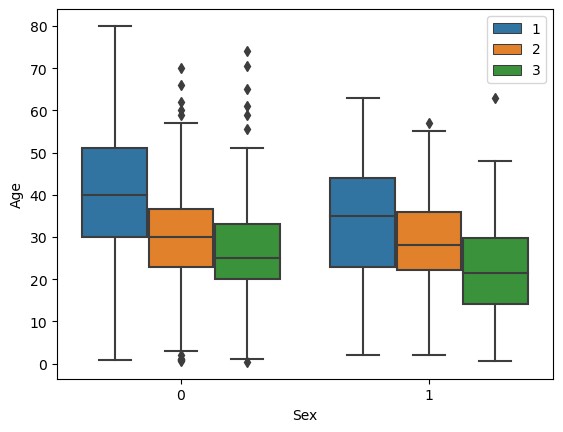

In [118]:
sns.boxplot(x="Sex",y="Age",data=dataa,hue="Pclass")
plt.legend(loc="best")
plt.show()

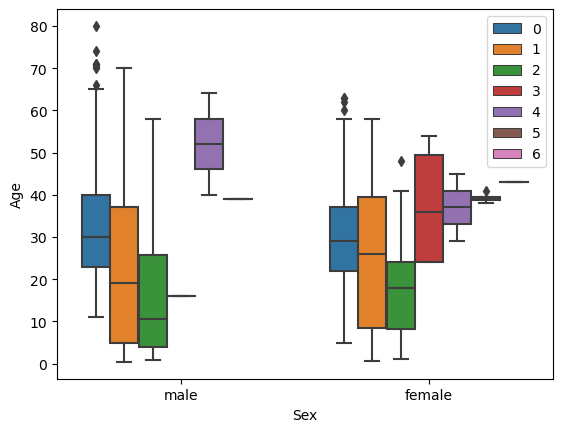

In [113]:
sns.boxplot(x="Sex",y="Age",hue="Parch",data=dataa)
plt.legend(loc="best")
plt.show()

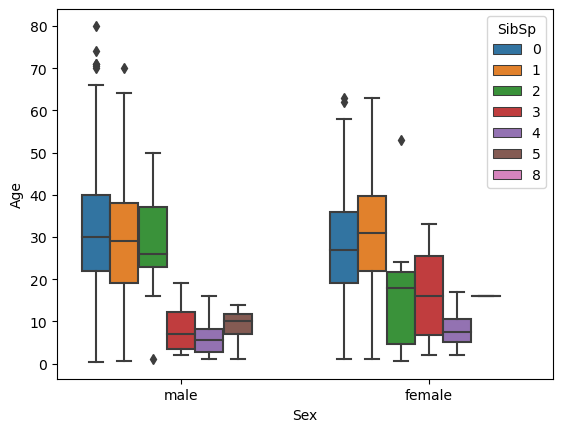

In [114]:
sns.boxplot(x="Sex",y="Age",hue="SibSp",data=dataa)
plt.show()

<Axes: >

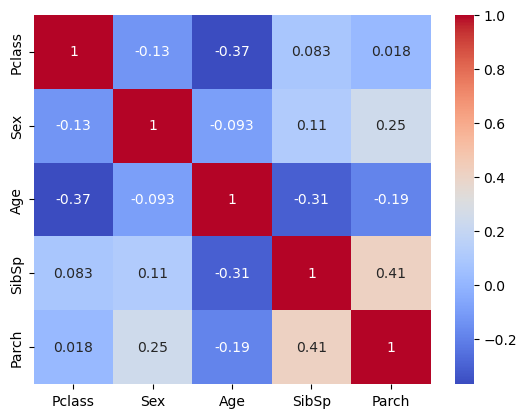

In [240]:
sns.heatmap(dataa.drop(["Survived","Name","PassengerId","Fare","Embarked"],axis=1).corr(),annot=True,cmap="coolwarm")

Age is not correlated with sex but it is negatively correlated Parch,SibSp,Parch

In [241]:
Age_indices = list(dataa[dataa["Age"].isnull()].index)
print(len(Age_indices))

177


Loop through the each missing age in the list to locate the rows that have same SibSp,Parch,Pclass values and filling the missing age with the median those rows.If rows not found, simply fill the missing age with the median of the entire Age column.

In [242]:
for index in Age_indices:
    medainAge=dataa["Age"].median()
    AgePerdiction=dataa["Age"][(dataa["SibSp"]==dataa.iloc[index]["SibSp"])&
                               (dataa["Parch"]==dataa.iloc[index]["SibSp"])&
                               (dataa["Pclass"]==dataa.iloc[index]["Pclass"])].median()
    if np.isnan(AgePerdiction):
        dataa["Age"].iloc[index] = medainAge
    else:
        dataa["Age"].iloc[index] = AgePerdiction

C:\Users\venkatesh\AppData\Local\Temp\ipykernel_11616\1305282810.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataa["Age"].iloc[index] = AgePerdiction
C:\Users\venkatesh\AppData\Local\Temp\ipykernel_11616\1305282810.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataa["Age"].iloc[index] = AgePerdiction
C:\Users\venkatesh\AppData\Local\Temp\ipykernel_11616\1305282810.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataa[

C:\Users\venkatesh\AppData\Local\Temp\ipykernel_11616\1305282810.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataa["Age"].iloc[index] = AgePerdiction
C:\Users\venkatesh\AppData\Local\Temp\ipykernel_11616\1305282810.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataa["Age"].iloc[index] = AgePerdiction
C:\Users\venkatesh\AppData\Local\Temp\ipykernel_11616\1305282810.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataa[

In [243]:
dataa["Age"].isnull().sum()

0

# Data Transformation

C:\Users\venkatesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


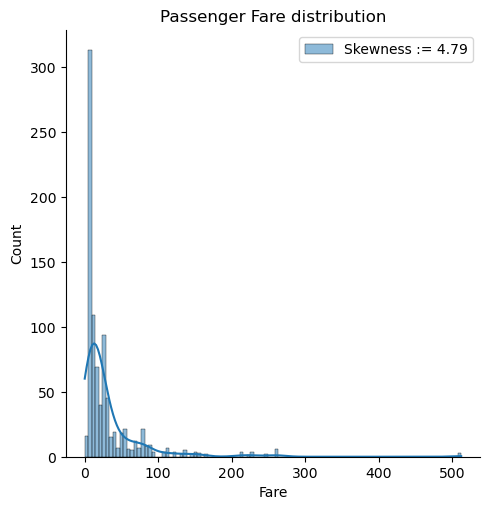

In [123]:
sns.displot(dataa["Fare"],label="Skewness := %.2f"%(dataa["Fare"].skew()),kde=True)
plt.legend(loc="best")
plt.title("Passenger Fare distribution")
plt.show()

Here,We observe that passenger fare column has a very high positive skewness. Therefore, we will apply a log transformation.

In [126]:
dataa["Fare"] = dataa["Fare"].map(lambda x: np.log(x) if x>0 else 0)

C:\Users\venkatesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


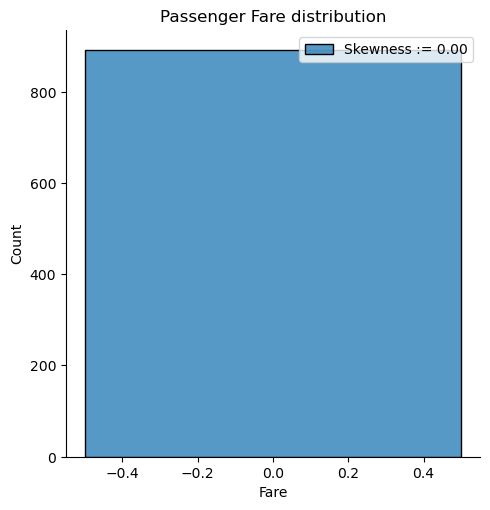

In [128]:
sns.displot(dataa["Fare"],label="Skewness := %.2f"%(dataa["Fare"].skew()))
plt.legend(loc="best")
plt.title("Passenger Fare distribution")
plt.show()

In [244]:
dataa["FamilySize"]=dataa["SibSp"]+dataa["Parch"]+1
dataa

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,19.0,1,2,23.4500,S,4
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,C,1


In [245]:
dataa["Tittle"] = dataa["Name"].str.extract(' ([A-Za-z]+)\.',expand = False)
dataa["Tittle"]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Tittle, Length: 891, dtype: object

In [246]:
dataa["Tittle"]=dataa["Tittle"].replace(["Dr","Rev","Major","Lady","Jonkheer","Don","Capt","Countess","Sir","Dona","Col"],"Rare")
dataa["Tittle"]=dataa["Tittle"].replace(["Mlle","Ms"],"Miss")
dataa["Tittle"]=dataa["Tittle"].replace("Mme","Mr")

In [247]:
dataa["Tittle"]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886    Rare
887    Miss
888    Miss
889      Mr
890      Mr
Name: Tittle, Length: 891, dtype: object

In [248]:
dataa[["Tittle","Survived"]].groupby(["Tittle"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Tittle,Survived
3,Mrs,0.792000
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.158301


Again this demonstration has shown that female passengers had more probability to survive than male passengers

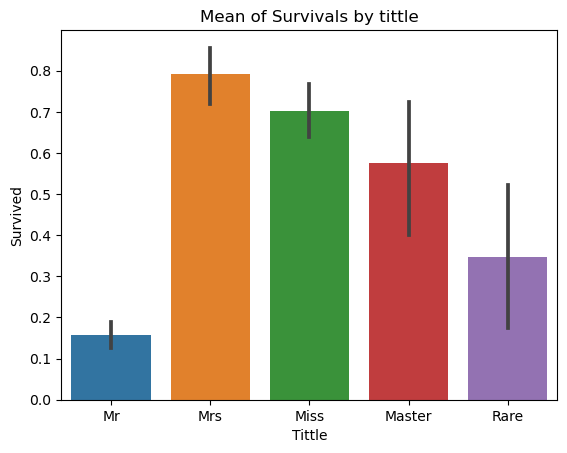

In [249]:
sns.barplot(x="Tittle",data=dataa,y="Survived")
plt.title("Mean of Survivals by tittle")
plt.xlabel("Tittle")
plt.ylabel("Survived")
plt.show()

# Feature Encoding
Machine Learning model requires all input and output variables to be numeric. Therfore, we need to encode all categorical data before we can fit the models to the data.

In [251]:
dataa.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Tittle,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,2,Mr,"(-0.512, 128.082]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,2,Mrs,"(-0.512, 128.082]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,1,Miss,"(-0.512, 128.082]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,2,Mrs,"(-0.512, 128.082]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1,Mr,"(-0.512, 128.082]"


In [253]:
dataa=pd.get_dummies(dataa,columns=["Tittle"])
dataa=pd.get_dummies(dataa,columns=["Embarked"],prefix="Em")
dataa

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,FamilySize,FareBand,Tittle_Master,Tittle_Miss,Tittle_Mr,Tittle_Mrs,Tittle_Rare,Em_C,Em_Q,Em_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2,"(-0.512, 128.082]",False,False,True,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2,"(-0.512, 128.082]",False,False,False,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1,"(-0.512, 128.082]",False,True,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2,"(-0.512, 128.082]",False,False,False,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1,"(-0.512, 128.082]",False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,1,"(-0.512, 128.082]",False,False,False,False,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,1,"(-0.512, 128.082]",False,True,False,False,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,19.0,1,2,23.4500,4,"(-0.512, 128.082]",False,True,False,False,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,1,"(-0.512, 128.082]",False,False,True,False,False,True,False,False


In [255]:
#Dividing fare into four bands

dataa["FareBand"] = pd.cut(dataa["Fare"],4)
dataa[["FareBand","Survived"]].groupby(["FareBand"],as_index=False).mean().sort_values(by="FareBand")

,FareBand,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [256]:
dataa.loc[dataa["Fare"]<=128.082,"Fare"]=0
dataa.loc[(dataa["Fare"] > 128.082)&(dataa["Fare"]<=256.165),"Fare"]=1
dataa.loc[(dataa["Fare"] > 256.165)&(dataa["Fare"]<=384.247),"Fare"]=2
dataa.loc[dataa["Fare"]> 384.247,"Fare"]=3

In [257]:
dataa["Fare"]=dataa["Fare"].astype('int')

In [258]:
dataa=dataa.drop("FareBand",axis=1)

In [261]:
dataa.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,FamilySize,Tittle_Master,Tittle_Miss,Tittle_Mr,Tittle_Mrs,Tittle_Rare,Em_C,Em_Q,Em_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,0,2,False,False,True,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,0,2,False,False,False,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,0,1,False,True,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0,2,False,False,False,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,0,1,False,False,True,False,False,False,False,True


In [296]:
dataa=dataa.drop("Name",axis=1)

In [297]:
dataa

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Tittle_Master,Tittle_Miss,Tittle_Mr,Tittle_Mrs,Tittle_Rare,Em_C,Em_Q,Em_S
0,1,0,3,0,22.0,1,0,0,2,False,False,True,False,False,False,False,True
1,2,1,1,1,38.0,1,0,0,2,False,False,False,True,False,True,False,False
2,3,1,3,1,26.0,0,0,0,1,False,True,False,False,False,False,False,True
3,4,1,1,1,35.0,1,0,0,2,False,False,False,True,False,False,False,True
4,5,0,3,0,35.0,0,0,0,1,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,0,1,False,False,False,False,True,False,False,True
887,888,1,1,1,19.0,0,0,0,1,False,True,False,False,False,False,False,True
888,889,0,3,1,19.0,1,2,0,4,False,True,False,False,False,False,False,True
889,890,1,1,0,26.0,0,0,0,1,False,False,True,False,False,True,False,False


# Modelling
Since,Titanic is a classification problem, we need to use classification models, also known as Classifiers,to train our model to make predictions.

# Split the data into training and testing sets

In [299]:
w = dataa.drop("Survived",axis=1)
z = dataa["Survived"]

w_train,w_test,z_train,z_test = train_test_split(w,z,test_size=0.2,random_state=42,stratify=z)

# Fit model to data and make predictions
This require three steps.They are<br>
&emsp;&emsp;&emsp;<b>i.</b>Instantiate the model.<br>
&emsp;&emsp;&emsp;<b>ii.</b>Fit the model to the training set.<br>
&emsp;&emsp;&emsp;<b>iii.</b>Predict the data into dataset.

# Logistic Regression

In [ ]:
#Instantiate the model.
model=LogisticRegression()

#Fit the model to the training set.
model.fit(w_train,z_train)


#Predict the data into dataset.
z_pred = model.predict(w_test)
accuracy_log=round(model.score(w_train,z_train)*100,2)
print("Accuracy:",accuracy_log)

In [301]:
df=model.predict(w_test)
df

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [302]:
df=model.predict(w_train)
df

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,

In [303]:
print(w_train.shape,z_train.shape,w_test.shape)

(712, 16) (712,) (179, 16)
